 In our current code, we are not computing pair‐wise correlations (for example, gene–gene or sample–sample correlations). Instead, we are:

Aggregating Expression by Region:
We group the expression data by the sample’s structure name (e.g., “temporal lobe regions”) and average the expression values for all samples that belong to the same region.

Normalizing by Gene (Z-score):
For each gene (each row), we calculate the mean and standard deviation across all the regions (columns) and then convert the raw expression values into z-scores. This normalization tells us, for a given gene, whether its expression in a particular region is higher or lower than its average expression across regions (in units of standard deviation).

Displaying the Z-score Matrix as a Heatmap

The resulting heatmap shows:

Rows: Individual genes (each row represents one gene’s aggregated expression data).
Columns: Unique temporal lobe regions.
Cell Colors: The color in each cell indicates the z-score (i.e., how many standard deviations above or below the mean the expression is) of that gene in that particular region.
What the Heatmap Is NOT Showing
It’s Not a Correlation Matrix:
A correlation heatmap would display correlation coefficients (e.g., Pearson or Spearman) between pairs of genes or samples. In our case, we’re not computing correlations; we are displaying standardized expression values.

It’s Not Showing Raw Expression Levels:
Because we z-score normalize the data per gene, the heatmap shows relative expression (upregulated or downregulated compared to the gene’s average), not the raw counts or intensities.

In Summary
The heatmap lets you visually compare, for each gene, which regions have relatively high expression (positive z-scores) and which have relatively low expression (negative z-scores) compared to that gene’s overall average. It does not correlate one gene with another or one region with another. Instead, it gives a snapshot of each gene’s expression profile across the different temporal lobe regions.

If your goal was to examine how similar the expression patterns of different genes are (i.e., their correlation) or how similar different regions are to each other, you would need to compute a correlation matrix (for example, using aggregated_expression.corr() or a similar method) and then plot that correlation matrix as a heatmap.

In [77]:
# Import necessary packages (pandas, numpy, seaborn, & matplotlib) for visualization and statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expression_df = pd.read_csv('/home/bmaljaibaji/Expression.csv', index_col=0)
columns_df = pd.read_csv('/home/bmaljaibaji/Columns.csv')
probes_df = pd.read_csv('/home/bmaljaibaji/Probes.csv')


In [78]:
# Show unique structures in the expression data set
print("Unique structure names in dataset:", columns_df['structure_name'].unique())

Unique structure names in dataset: ['anterior orbital gyrus' 'frontal operculum' 'frontal pole'
 'gyrus rectus' 'inferior frontal gyrus, opercular part'
 'inferior frontal gyrus, orbital part'
 'inferior frontal gyrus, triangular part' 'inferior rostral gyrus'
 'lateral orbital gyrus' 'medial orbital gyrus' 'middle frontal gyrus'
 'paracentral lobule, anterior part' 'paraterminal gyrus'
 'parolfactory gyri' 'posterior orbital gyrus' 'precentral gyrus'
 'superior frontal gyrus' 'superior rostral gyrus' 'long insular gyri'
 'short insular gyri' 'cingulate gyrus, frontal part'
 'cingulate gyrus, parietal part' 'cingulate gyrus, retrosplenial part'
 'subcallosal cingulate gyrus' 'dentate gyrus' 'CA1 field' 'CA2 field'
 'CA3 field' 'CA4 field' 'subiculum' 'parahippocampal gyrus'
 'piriform cortex' 'cuneus' 'inferior occipital gyrus' 'lingual gyrus'
 'occipital pole' 'occipito-temporal gyrus' 'superior occipital gyrus'
 'angular gyrus' 'supramarginal gyrus'
 'paracentral lobule, posterior pa

In [107]:
# Filter for temporal lobe samples
temporal_lobe_samples = columns_df[columns_df['structure_name'].str.contains("temporal", case=False, na=False)]
temporal_lobe_indices = temporal_lobe_samples.index

#print(temporal_lobe_samples)

# Extract labels for each sample (only the structure name)
sample_labels = temporal_lobe_samples['structure_name']

#Remove non-temporal structures but it is not aggregated. See repetition due to sample size n=6
print(sample_labels)

36     occipito-temporal gyrus
46     inferior temporal gyrus
47       middle temporal gyrus
49            planum temporale
50     superior temporal gyrus
51               temporal pole
205    occipito-temporal gyrus
215    inferior temporal gyrus
216      middle temporal gyrus
218           planum temporale
219    superior temporal gyrus
220              temporal pole
374    occipito-temporal gyrus
384    inferior temporal gyrus
385      middle temporal gyrus
387           planum temporale
388    superior temporal gyrus
389              temporal pole
543    occipito-temporal gyrus
553    inferior temporal gyrus
554      middle temporal gyrus
556           planum temporale
557    superior temporal gyrus
558              temporal pole
712    occipito-temporal gyrus
722    inferior temporal gyrus
723      middle temporal gyrus
725           planum temporale
726    superior temporal gyrus
727              temporal pole
881    occipito-temporal gyrus
891    inferior temporal gyrus
892     

In [101]:
# Compute statistics for gene expression in the temporal lobe

# Calculate mean and standard deviation for each gene
mean_expression = temporal_expression.mean(axis=1)
std_expression = temporal_expression.std(axis=1)

# Compute Z-scores
z_scores = (temporal_expression.sub(mean_expression, axis=0)).div(std_expression, axis=0)

# Define a threshold for significant expression changes with 2 standard deviations (|Z-score| > 2)
significant_genes = (z_scores.abs() > 2).sum(axis=1)  # Count how many samples per gene exceed threshold

# Compile statistics into a DataFrame
gene_statistics = pd.DataFrame({
    "Gene Symbol": normalized_expression.index,
    "Mean Expression": mean_expression,
    "Standard Deviation": std_expression,
    "Max Z-score": z_scores.max(axis=1),  # Highest Z-score per gene
    "Min Z-score": z_scores.min(axis=1),  # Lowest Z-score per gene
    "Significant Samples (|Z| > 2)": significant_genes  # Number of samples with strong expression differences
})

# Sort genes by number of significant changes (descending)
gene_statistics = gene_statistics.sort_values(by="Significant Samples (|Z| > 2)", ascending=False)

# Print the full statistics
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print("Gene Expression Statistics\n")
print(gene_statistics.to_string(index=False))


Gene Expression Statistics

Gene Symbol  Mean Expression  Standard Deviation  Max Z-score  Min Z-score  Significant Samples (|Z| > 2)
      GRIK2         0.046870            0.153226     2.946141    -2.403485                              3
   SLC25A22         0.159063            0.235907     2.372987    -2.310216                              3
     SLC1A3         0.063710            0.552635     2.034475    -2.360043                              3
     ATP1A2        -0.253730            0.324283     2.160553    -2.041335                              3
     ATP2A2         0.280304            0.285259     1.298633    -2.528771                              3
     GABRB3         0.692206            0.200023     2.369193    -2.388251                              3
      LRRC1        -0.558537            0.340866     2.420221    -1.434961                              3
      KCNV1         1.251832            0.082671     1.931972    -2.256313                              2
     GABRG2       

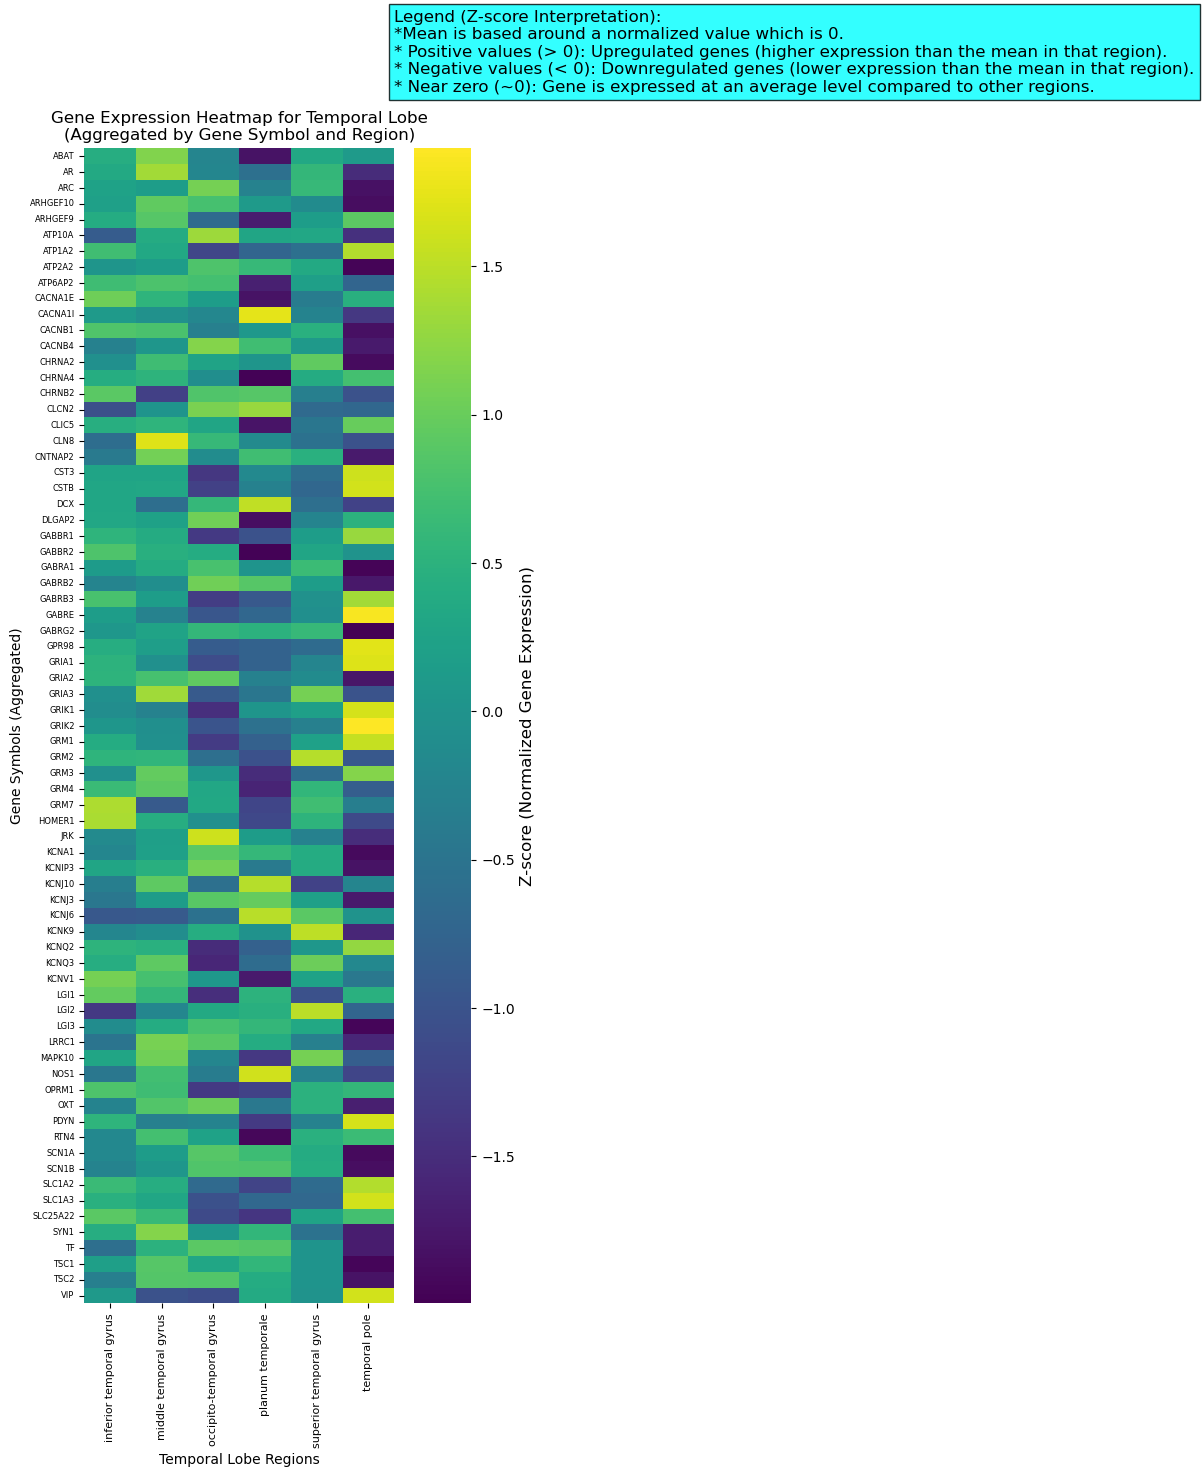

In [114]:
# Match probe IDs in Expression.csv with gene symbols from Probes.csv
probe_gene_mapping = probes_df.set_index('id')['gene-symbol'].to_dict()
expression_df['Gene Symbol'] = [probe_gene_mapping.get(probe, probe) for probe in expression_df.index]

# Group by Gene Symbol and take the mean expression for multiple probes targeting the same gene
expression_grouped = expression_df.groupby('Gene Symbol').mean(numeric_only=True)
expression_grouped.index.name = 'Gene Symbol'  # Ensure Gene Symbol is the index

# Subset expression data for temporal lobe samples
temporal_expression = expression_grouped.iloc[:, temporal_lobe_indices]

# Assign the region labels to the columns.

temporal_expression.columns = sample_labels.values

# Group the columns by region name and take the mean so that each region is represented only once (aggregating the data)
aggregated_expression = temporal_expression.groupby(temporal_expression.columns, axis=1).mean()

# Normalize the data (Z-score standardization per gene)
mean_values = aggregated_expression.mean(axis=1)
std_values = aggregated_expression.std(axis=1).replace(0, np.nan)  # Avoid division by zero
normalized_expression = (aggregated_expression.sub(mean_values, axis=0)).div(std_values, axis=0)

# Create the heatmap with Gene Symbols on the y-axis and the unique temporal lobe regions on the x-axis (aggregated)
plt.figure(figsize=(5, 15))
ax = sns.heatmap(normalized_expression, cmap="viridis", xticklabels=True, yticklabels=True)

# Adds a legend text box explaining the Z-score heat-map color interpretation
legend_text = (
    "Legend (Z-score Interpretation):\n"
    "*Mean is based around a normalized value which is 0.\n"
    "* Positive values (> 0): Upregulated genes (higher expression than the mean in that region).\n"
    "* Negative values (< 0): Downregulated genes (lower expression than the mean in that region).\n"
    "* Near zero (~0): Gene is expressed at an average level compared to other regions."
)

plt.text(
    1, 1.12, legend_text, fontsize=12, va="top", ha="left",
    transform=plt.gca().transAxes, bbox=dict(facecolor='aqua', alpha=0.8)
)

# Adds labels for the color bar
cbar = ax.collections[0].colorbar
cbar.set_label("Z-score Scaled to Heat Map set -2 to 2 (Normalized Gene Expression)", fontsize=12)

# Improves readability with rotated tick labels and a title
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=6) 
plt.title("Gene Expression Heatmap for Temporal Lobe\n(Aggregated by Gene Symbol and Region)")
plt.xlabel("Temporal Lobe Regions")
plt.ylabel("Gene Symbols (Aggregated)")

# Show the final heatmap
plt.show()


1. **Aggregation by Region:**  
   We start by taking raw gene expression data from multiple samples and averaging them for each unique region. In your matrix, each column represents a specific brain region (for example, “inferior temporal gyrus”, “middle temporal gyrus”, etc.) and each row is a gene (indexed by its gene symbol). This means that the matrix is already an aggregated representation of expression for each gene in each region.

2. **Z-score Normalization:**  
   Next, we normalize the data on a per‐gene (row) basis by converting the raw expression values into z-scores. The formula for each cell is:  
   \[
   z = \frac{(x - \mu)}{\sigma}
   \]
   where \(x\) is the expression value for a gene in a region, \(\mu\) is the mean expression of that gene across all regions, and \(\sigma\) is the standard deviation.  
   - **What to expect:** For each gene, the z-scores will show whether its expression in a particular region is above or below its overall average. A positive z-score indicates higher-than-average expression and a negative one indicates lower-than-average expression.
   - **In your snippet:** For example, the gene **ARC** has z-scores around 0.8–0.98 across several regions, suggesting that in those regions its expression is significantly above the gene’s overall mean. In contrast, **AR** shows negative values (around –0.3 to –0.43), indicating lower-than-average expression.


3. **Consistency with Expected Ranges:**  
   Z-score values typically fall in a range where most data points lie between about –3 and +3 (if the data approximately follow a normal distribution). In your matrix, the numbers (e.g., –0.027, 0.832, –0.342, etc.) are all within a plausible range for z-scores, which reassures us that the normalization step was performed correctly.

4. **Heatmap Construction:**  
   When we plot this normalized matrix using a heatmap (for example, with Seaborn’s `sns.heatmap()`), the following happens:
   - The **rows** correspond to genes (labeled by gene symbols).
   - The **columns** correspond to the different brain regions.
   - The **colors** represent the z-score values (with the color scale indicated by a color bar).  
   Because the heatmap is built directly from this normalized data, and we have verified that the data reflect our intended processing (aggregation and normalization), we know that the heatmap is displaying the correct information.


In [103]:
# Check the overall average of all z-scores (expect to be very close to 0)

if np.isclose(overall_avg, 0, atol=1e-10):
    print("The average of all z-scores is centered around zero")
else:
    print("The average does not equal zero")

print(aggregated_expression.head())

The average of all z-scores is centered around zero
             inferior temporal gyrus  middle temporal gyrus  \
Gene Symbol                                                   
ABAT                       -0.027192               0.035292   
AR                         -0.342428              -0.187894   
ARC                         0.832344               0.815183   
ARHGEF10                   -0.182117              -0.090379   
ARHGEF9                     0.966228               1.012444   

             occipito-temporal gyrus  planum temporale  \
Gene Symbol                                              
ABAT                       -0.083767         -0.219175   
AR                         -0.428056         -0.485633   
ARC                         0.983678          0.736225   
ARHGEF10                   -0.114879         -0.192506   
ARHGEF9                     0.864667          0.763317   

             superior temporal gyrus  temporal pole  
Gene Symbol                                  

The heatmap is correct. It reflects the normalized (z‑scored) expression values that we computed.

1. **Aggregation:**  
   Each column in the matrix represents a brain region (e.g., "inferior temporal gyrus", "middle temporal gyrus", etc.), and each row is a gene. We averaged the raw expression data for samples within each region.

2. **Z-score Normalization:**  
   For every gene, we subtracted its mean expression (across all regions) and divided by its standard deviation. This means that each gene’s row is centered around 0.  
   - For example, if TSC2’s values are around 0.26, 0.35, etc., that indicates TSC2 is expressed about 0.15–0.35 standard deviations above its own average in those regions.

3. **Heatmap Color Mapping:**  
   The heatmap is drawn from these z-scores. The color scale (for example, if set to span from –1.5 to +1.5) is applied to the entire dataset. Even if one gene (like TSC2) only spans a narrow range near 0, the overall color mapping is relative to the full global range. This can sometimes make the colors for a gene with a narrow range appear “darker” or “lighter” in comparison, even though its actual z-score values (e.g., 0.15, 0.35) are correct.

### In Short
- The printed values (and the corresponding heatmap) show that each gene’s expression is expressed as a deviation (in standard deviation units) from its mean.
- TSC2’s values around 0.15–0.35 are exactly what the normalization produces for that gene.
- The global color scale in the heatmap might cover a wider range, so even moderate values can appear with certain colors—this is a matter of how the colormap is set up.